In [61]:
from query import mol_from_smiles as m, find_matches, into_params
from serve import ffname

from openff.toolkit import ForceField
from rdkit import Chem

ff = ForceField(ffname)
params = into_params(ff)

def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [122]:
with open("want.smiles") as inp:
    for line in inp:
        if line.startswith("#"):
            continue
        pid, smirks, *smiles = line.split()
        for smile in smiles:
            mol = mol_from_smiles(smile)
            matches = find_matches(params, mol)
            if pid not in matches.values():
                for k, v in matches.items():
                    print(k, v)
                bad_mol = mol_with_atom_index(mol)
                assert False, f"failed for {pid} ({smirks}) with {smile}"

print("all checks passed")

all checks passed


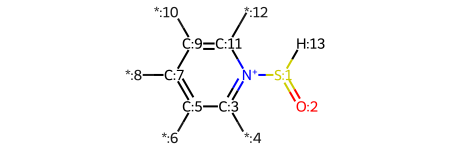

In [121]:
bad_mol

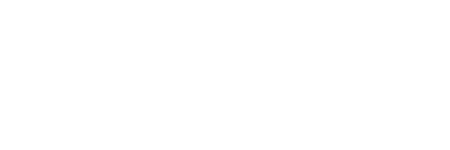

 [N+]1(C(=O)*)=C(*)c(*)c(*)c(*)c(*)1


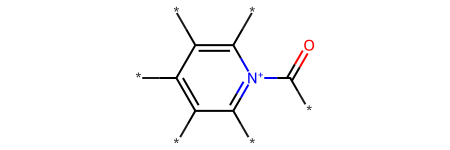

 [N+]1(C(=O)*)=S(*)c(*)c(*)c(*)c(*)1


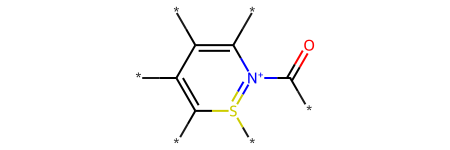

 [N+]1(S(=O)*)=C(*)c(*)c(*)c(*)c(*)1


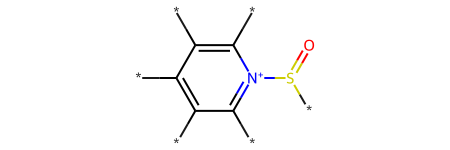

 [N+]1(N=O)=C(*)c(*)c(*)c(*)c(*)1


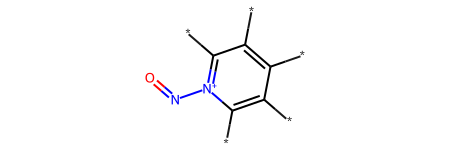

KeyboardInterrupt: Interrupted by user

In [118]:
while (smiles := input()) != 'q':
    try:
        display(m(smiles))
    except e:
        print(e)